#### IMPORTING MODULES

In [13]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#### LOADING THE DATASET

In [14]:
df=pd.read_csv(r'../input/abcnews-date-text.csv')

In [15]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [16]:
df.head(10)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [17]:
df.dtypes

publish_date      int64
headline_text    object
dtype: object

In [18]:
df["year"] = df["publish_date"].astype(str).str[:4].astype(np.int64)
df.head()

,publish_date,headline_text,year
0,20030219,aba decides against community broadcasting lic...,2003
1,20030219,act fire witnesses must be aware of defamation,2003
2,20030219,a g calls for infrastructure protection summit,2003
3,20030219,air nz staff in aust strike for pay rise,2003
4,20030219,air nz strike to affect australian travellers,2003


In [19]:
df["month"] = df["publish_date"].astype(str).str[4:6].astype(np.int64)
df.head()

,publish_date,headline_text,year,month
0,20030219,aba decides against community broadcasting lic...,2003,2
1,20030219,act fire witnesses must be aware of defamation,2003,2
2,20030219,a g calls for infrastructure protection summit,2003,2
3,20030219,air nz staff in aust strike for pay rise,2003,2
4,20030219,air nz strike to affect australian travellers,2003,2


In [20]:
df.year.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [21]:
df.month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

In [22]:
df["word_count"] = df["headline_text"].str.len()
df.head()

,publish_date,headline_text,year,month,word_count
0,20030219,aba decides against community broadcasting lic...,2003,2,50
1,20030219,act fire witnesses must be aware of defamation,2003,2,46
2,20030219,a g calls for infrastructure protection summit,2003,2,46
3,20030219,air nz staff in aust strike for pay rise,2003,2,40
4,20030219,air nz strike to affect australian travellers,2003,2,45


Number of Articles per year:

Text(0.5,1,'Number of Articles per Year')

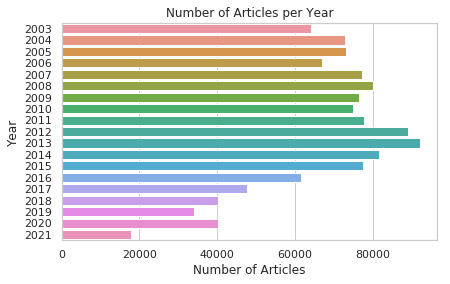

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

with sns.color_palette("GnBu_d", 10):
    ax= sns.countplot(y="year",data=df)
    ax.set(xlabel='Number of Articles', ylabel='Year')
plt.title("Number of Articles per Year")

In [24]:
df["headline_text"][0]

'aba decides against community broadcasting licence'

Remove words that don't carry much meaning: such words are called "stop words"(such as "a", "and", "is", and "the")

In [25]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Remove stop words from "words"

words = [w for w in words if not w in stopwords.words("english")]

NameError: name 'words' is not defined

In [28]:
df.shape

(1244184, 5)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = "english",   
                             max_features = 30)

news_array = vectorizer.fit_transform(df["headline_text"])

news_array = news_array.toarray()

vocab = vectorizer.get_feature_names()

dist = np.sum(news_array, axis=0)

for tag, count in zip(vocab, dist):
    print (count, tag)

17416 australia
13649 australian
9613 calls
9618 car
11195 charged
9748 coast
16988 council
18187 court
12379 crash
10382 day
12783 death
10062 government
17104 govt
11983 health
9679 hospital
15595 interview
30762 man
10553 murder
33742 new
16544 nsw
13002 plan
39852 police
12602 qld
10539 report
10411 sa
23732 says
13250 sydney
13505 wa
12862 water
9702 world
